# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **religious events or traditions** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **religious events or traditions**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **religious events or traditions**?  For this category you might consider calendar events, demographic data about religion in the region and neighboring regions, participation in religious events, or how religious events relate to political events, social movements, or historical events.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

[List of AC Milan seasons](https://en.wikipedia.org/wiki/List_of_A.C._Milan_seasons)

[List of Juventus seasons](https://en.wikipedia.org/wiki/List_of_Juventus_F.C._seasons)

[List of Inter Milan seasons](https://en.wikipedia.org/wiki/List_of_Inter_Milan_seasons)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib.colors as col
import matplotlib.cm as cm
import seaborn as sns
import re

%matplotlib notebook

plt.style.use('seaborn-colorblind')

In [2]:
!pip install --upgrade pip
!pip install lxml

In [3]:
import lxml

# preparing data
dict_datasets={
    "Juve":"https://en.wikipedia.org/wiki/List_of_Juventus_F.C._seasons",
    "Inter":"https://en.wikipedia.org/wiki/List_of_Inter_Milan_seasons",
    "Milan":"https://en.wikipedia.org/wiki/List_of_A.C._Milan_seasons",
}

In [4]:
df_inter=pd.read_html(dict_datasets['Inter'])

In [5]:
df_inter[2].head()

Season                                          League 1                \
    Season                                               Div Pld   W  D  L   
0  1908–09  Campionato Federale di Prima Categoria/Lombardia   2   0  0  2   
1  1909–10                                   Prima Categoria  16  12  1  3   
2  1910–11                                   Prima Categoria  16   6  1  9   
3  1911–12                                   Prima Categoria  18  10  1  7   
4  1912–13                                   Prima Categoria  10   6  0  4   

                   Coppa Italia 2 Supercoppa Italiana 3 UEFA Competitions[E]  \
   GF  GA Pts  Pos Coppa Italia 2 Supercoppa Italiana 3                EC/CL   
0   2   5   0  3rd              –                     –                    –   
1  55  26  25  1st              –                     –                    –   
2  24  31  13  6th              –                     –                    –   
3  42  22  21  4th              –                     –                    –   
4  24  14  12  3rd              –                     –                    –   

        Other Competitions          Top goalscorer(s) 4                        \
  IC/EL Other Competitions          Top goalscorer(s) 4 Top goalscorer(s) 4.1   
0     –                  –  Achille GamaBernard Schuler                     1   
1     –                  –               Ernest Peterly                    25   
2     –                  –                          NaN                   NaN   
3     –                  –                          NaN                   NaN   
4     –                  –                          NaN                   NaN   

  Unnamed: 17_level_0  
  Unnamed: 17_level_1  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN

In [6]:
inter = df_inter[2]
del(df_inter)

In [7]:
df_juve=pd.read_html(dict_datasets["Juve"])

In [8]:
df_juve[2].head()

Season                                     League1                      \
    Season                                    Division    P    W    D    L   
0  1897–98                                         NaN  NaN  NaN  NaN  NaN   
1     1899                                         NaN  NaN  NaN  NaN  NaN   
2     1900   Campionato Nazionale di Football/Piemonte    4    2    0    2   
3     1901             Campionato Italiano di Football    2    1    0    1   
4     1902  Campionato Italiano di Football/Piemontese    4    2    1    1   

                      CoppaItalia2 Continental SupercoppaItaliana3 Manager(s)  \
    GF   GA  Pts  Pos CoppaItalia2 Continental SupercoppaItaliana3 Manager(s)   
0  NaN  NaN  NaN  NaN            –           –                   –        NaN   
1  NaN  NaN  NaN  NaN            –           –                   –        NaN   
2    5    3    4  2nd            –           –                   –        NaN   
3    7    3    2  3rd            –           –                   –        NaN   
4   10    5    5  2nd            –           –                   –        NaN   

  Top goalscorer(s)4                       
  Top goalscorer(s)4 Top goalscorer(s)4.1  
0                NaN                  NaN  
1                NaN                  NaN  
2                NaN                  NaN  
3                NaN                  NaN  
4                NaN                  NaN

In [9]:
juve = df_juve[2]
del(df_juve)

In [10]:
df_milan = pd.read_html(dict_datasets["Milan"])
df_milan[2].head()

Season League[A]                                     \
      Season  Division                                  P   
0  1899–1900       Reg  qualified as the only participant   
1  1899–1900       Fed                                  1   
2    1900–01       Reg                                  1   
3    1900–01       Fed                                  2   
4    1901–02       Reg      qualified as the title holder   

                                                                         \
                                   W                                  D   
0  qualified as the only participant  qualified as the only participant   
1                                  0                                  0   
2                                  1                                  0   
3                                  2                                  0   
4      qualified as the title holder      qualified as the title holder   

                                                                         \
                                   L                                 GF   
0  qualified as the only participant  qualified as the only participant   
1                                  1                                  0   
2                                  0                                  2   
3                                  0                                  6   
4      qualified as the title holder      qualified as the title holder   

                                                                         \
                                  GA                                Pts   
0  qualified as the only participant  qualified as the only participant   
1                                  3                                NaN   
2                                  0                                NaN   
3                                  2                                NaN   
4      qualified as the title holder      qualified as the title holder   

                                     Cup[B] Europe / Other                   \
                                 Pos Cup[B] Europe / Other Europe / Other.1   
0  qualified as the only participant    NaN            NaN              NaN   
1                                3rd    NaN            NaN              NaN   
2                                NaN    NaN            NaN              NaN   
3                                1st    NaN            NaN              NaN   
4      qualified as the title holder    NaN            NaN              NaN   

  Top goalscorer(s)[2][C]       Unnamed: 15_level_0 Unnamed: 16_level_0  
                  Name(s) Goals Unnamed: 15_level_1 Unnamed: 16_level_1  
0                     NaN  none                 NaN                 NaN  
1                     NaN  none                 NaN                 NaN  
2          Herbert Kilpin     4                 NaN                 NaN  
3          Herbert Kilpin     4                 NaN                 NaN  
4                     NaN  none                 NaN                 NaN

In [11]:
milan = df_milan[2]
del(df_milan)

Obviously we don't need all the features, what I'm most interested about might be the stability of these teamse, i.e., how these teams managed to keep up, using Win Rate% and their positions.

In [12]:
milan.columns

MultiIndex([(                 'Season',              'Season'),
            (              'League[A]',            'Division'),
            (              'League[A]',                   'P'),
            (              'League[A]',                   'W'),
            (              'League[A]',                   'D'),
            (              'League[A]',                   'L'),
            (              'League[A]',                  'GF'),
            (              'League[A]',                  'GA'),
            (              'League[A]',                 'Pts'),
            (              'League[A]',                 'Pos'),
            (                 'Cup[B]',              'Cup[B]'),
            (         'Europe / Other',      'Europe / Other'),
            (         'Europe / Other',    'Europe / Other.1'),
            ('Top goalscorer(s)[2][C]',             'Name(s)'),
            ('Top goalscorer(s)[2][C]',               'Goals'),
            (    'Unnamed: 15_level_0', 

In [13]:
milan = milan[[('Season','Season'), ('League[A]','W'),('League[A]','P'),('League[A]','Pos')]]
inter = inter[[('Season','Season'), ('League 1','W'),('League 1','Pld'),('League 1','Pos')]]
juve = juve[[('Season','Season'), ('League1','W'),('League1','P'),('League1','Pos')]]

In [14]:
milan.head()

Season                          League[A]  \
      Season                                  W   
0  1899–1900  qualified as the only participant   
1  1899–1900                                  0   
2    1900–01                                  1   
3    1900–01                                  2   
4    1901–02      qualified as the title holder   

                                                                         
                                   P                                Pos  
0  qualified as the only participant  qualified as the only participant  
1                                  1                                3rd  
2                                  1                                NaN  
3                                  2                                1st  
4      qualified as the title holder      qualified as the title holder

In [15]:
juve.columns = ["Season", "Juve Win", "Juve Played", "Juve Position"]
inter.columns = ["Season", "Inter Win", "Inter Played", "Inter Position"]
milan.columns = ["Season", "Milan Win", "Milan Played", "Milan Position"]

In [16]:
data = pd.DataFrame()
data = pd.merge(juve, inter, on=["Season"])

In [17]:
data = pd.merge(data, milan, on=["Season"])

In [18]:
data.dropna()

,Season,Juve Win,Juve Played,Juve Position,Inter Win,Inter Played,Inter Position,Milan Win,Milan Played,Milan Position
0,1908–09,1,3,3rd,0,2,3rd,1,2,2nd
1,1908–09,1,3,3rd,0,2,3rd,did not qualify,did not qualify,did not qualify
2,1908–09,4,6,1st[43],0,2,3rd,1,2,2nd
3,1908–09,4,6,1st[43],0,2,3rd,did not qualify,did not qualify,did not qualify
4,1909–10,8,16,3rd,12,16,1st,6,16,6th
...,...,...,...,...,...,...,...,...,...,...
147,2016–17,29,38,1st,19,38,7th,18,38,6th
148,2017–18,30,38,1st,20,38,4th,18,38,6th
149,2018–19,28,38,1st,20,38,4th,19,38,5th
150,2018–19,28,38,1st,20,38,4th,19,38,5th


In [19]:
the_numbers = []
for i in range(39):
    the_numbers.append(str(i))

In [20]:
data = data.loc[data["Inter Win"].isin(the_numbers)]

In [21]:
data = data.loc[data["Milan Win"].isin(the_numbers)]

In [22]:
data.head()

,Season,Juve Win,Juve Played,Juve Position,Inter Win,Inter Played,Inter Position,Milan Win,Milan Played,Milan Position
0,1908–09,1,3,3rd,0,2,3rd,1,2,2nd
2,1908–09,4,6,1st[43],0,2,3rd,1,2,2nd
4,1909–10,8,16,3rd,12,16,1st,6,16,6th
5,1910–11,3,16,9th,6,16,6th,10,16,2nd
6,1911–12,3,18,8th,10,18,4th,14,18,2nd


In [23]:
data = data.iloc[22:,:]

In [24]:
data.head()

,Season,Juve Win,Juve Played,Juve Position,Inter Win,Inter Played,Inter Position,Milan Win,Milan Played,Milan Position
27,1926–27,17,28,3rd,15,28,5th,2,10,6th
28,1927–28,16,34,3rd,14,34,7th,10,20,4th
29,1927–28,16,34,3rd,14,34,7th,5,14,6th
30,1928–29,16,30,2nd,17,30,6th,18,30,2nd
31,1929–30,19,34,3rd,22,34,1st,11,34,11th


<IPython.core.display.Javascript object>


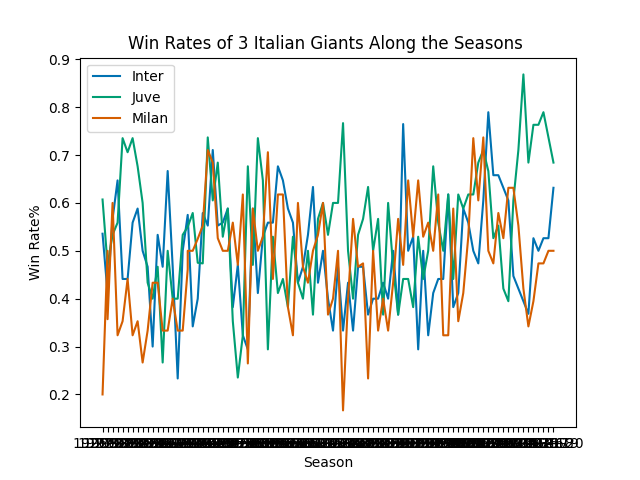

In [25]:
import matplotlib.pyplot as plt
# Inter points
x1 = data["Season"]
y1 = data["Inter Win"].astype(int) / data["Inter Played"].astype(int)
# plotting the line 1 points 
plt.plot(x1, y1, label = "Inter")
# Juve points
x2 = data["Season"]
y2 = data["Juve Win"].astype(int) / data["Juve Played"].astype(int)
# plotting the line 2 points 
plt.plot(x2, y2, label = "Juve")
# Milan points
x3 = data["Season"]
y3 = data["Milan Win"].astype(int) / data["Milan Played"].astype(int)
# plotting the line 2 points 
plt.plot(x3, y3, label = "Milan")
plt.xlabel('Season')
# Set the y axis label of the current axis.
plt.ylabel('Win Rate%')
# Set a title of the current axes.
plt.title('Win Rates of 3 Italian Giants Along the Seasons ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [26]:
data.to_csv("Assignment4-data.csv")

In [33]:
categories = ["Inter","Juve","Milan"]
avg_win_rate = [(data["Inter Win"].astype(int) / data["Inter Played"].astype(int)).mean(),
                (data["Juve Win"].astype(int) / data["Juve Played"].astype(int)).mean(),
                (data["Milan Win"].astype(int) / data["Milan Played"].astype(int)).mean(),]

In [34]:
data.head()

,Season,Juve Win,Juve Played,Juve Position,Inter Win,Inter Played,Inter Position,Milan Win,Milan Played,Milan Position
27,1926–27,17,28,3rd,15,28,5th,2,10,6th
28,1927–28,16,34,3rd,14,34,7th,10,20,4th
29,1927–28,16,34,3rd,14,34,7th,5,14,6th
30,1928–29,16,30,2nd,17,30,6th,18,30,2nd
31,1929–30,19,34,3rd,22,34,1st,11,34,11th


In [35]:
data.tail()

,Season,Juve Win,Juve Played,Juve Position,Inter Win,Inter Played,Inter Position,Milan Win,Milan Played,Milan Position
147,2016–17,29,38,1st,19,38,7th,18,38,6th
148,2017–18,30,38,1st,20,38,4th,18,38,6th
149,2018–19,28,38,1st,20,38,4th,19,38,5th
150,2018–19,28,38,1st,20,38,4th,19,38,5th
151,2019–20,26,38,1st,24,38,2nd,19,38,6th


<IPython.core.display.Javascript object>


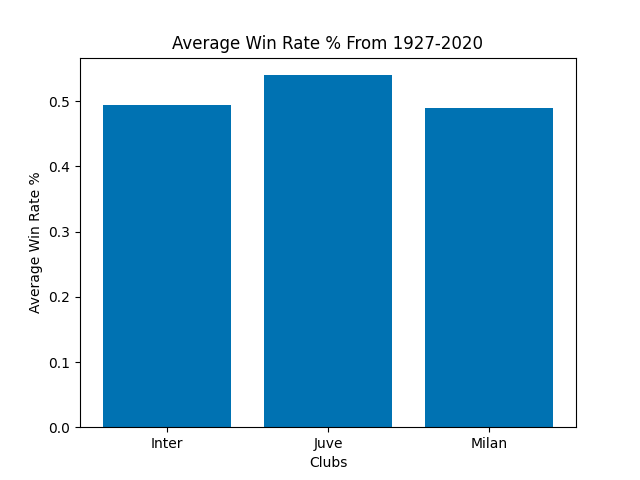

In [36]:
plt.bar(categories,avg_win_rate)
plt.title('Average Win Rate % From 1927-2020')
plt.xlabel('Clubs')
plt.ylabel('Average Win Rate %')
plt.show()